<a href="https://colab.research.google.com/github/nAkshat2103/ML-Assignment/blob/main/ParameterOptimizationSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
dataset = fetch_openml(name='covertype', version=1, as_frame=True)
X = dataset.data.sample(n=10000, random_state=42)  # Reduced dataset size for faster processing
y = dataset.target[X.index]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

results = []

param_grid = {'C': [0.1, 1], 'kernel': ['linear']}  # Focus on linear kernel for speed

skf = StratifiedKFold(n_splits=2)

In [3]:
for i in range(1, 6):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=i)
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=skf, n_jobs=-1)
    grid_search.fit(X_train, y_train)


    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    results.append({'Sample #': f'S{i}', 'Best Accuracy': test_accuracy, 'Best SVM Parameters': grid_search.best_params_})


Results Table:
  Sample #  Best Accuracy           Best SVM Parameters
0       S1       0.684333  {'C': 1, 'kernel': 'linear'}
1       S2       0.689333  {'C': 1, 'kernel': 'linear'}
2       S3       0.690667  {'C': 1, 'kernel': 'linear'}
3       S4       0.667333  {'C': 1, 'kernel': 'linear'}
4       S5       0.686333  {'C': 1, 'kernel': 'linear'}


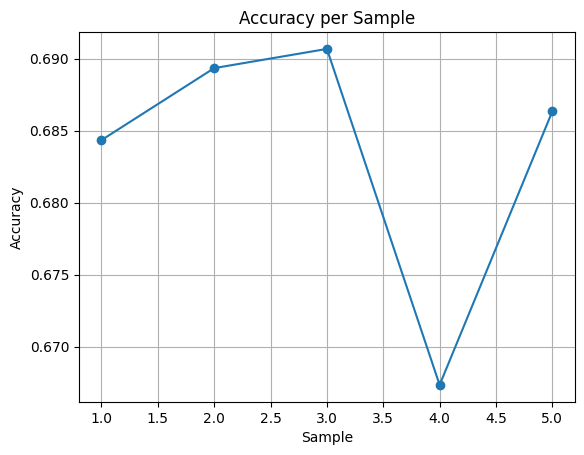

In [4]:
results_df = pd.DataFrame(results)

print("\nResults Table:")
print(results_df)
results_df.to_csv('SVM_results_optimized.csv', index=False)

plt.plot(range(1, 6), [r['Best Accuracy'] for r in results], marker='o')
plt.title("Accuracy per Sample")
plt.xlabel("Sample")
plt.ylabel("Accuracy")
plt.grid()
plt.show()